In [1]:
#2021.06.23. WED
#Hankyeong

#00. 패키지 호출
import pandas as pd
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, silhouette_samples, silhouette_score 
from sklearn.cluster import KMeans

#00-1. warning message ignore
warnings.filterwarnings(action='ignore')

#00-2. 시각화 옵션 설정하기. 
%matplotlib inline

#01. breast_cancer 데이터셋을 차원축소하기. 
#(1) 데이터셋 불러오기. 
bcancer = load_breast_cancer()

#(2) 데이터프레임으로 변환 후 탐색하기. 
df_bcancer = pd.DataFrame(bcancer.data, columns=bcancer.feature_names)
df_bcancer['target'] = bcancer.target
df_bcancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [2]:
#(3) feature 데이터 스케일링하기.
scaler = StandardScaler()
bcancer_scaling = scaler.fit_transform(bcancer.data)

#(4) 스케일링데이터셋을 데이터프레임으로 변환하기. 
df_bcancer_scaling = pd.DataFrame(bcancer_scaling, columns=bcancer.feature_names)
df_bcancer_scaling

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [3]:
#(4) PCA 객체 지정하고 n개의 주성분벡터 추출 설정하기. (단, n=2,5,10)
for n in [2,5,10]                                                                                :
    globals()[f'pca_{n}'] = PCA(n_components=n)
    globals()[f'bcancer_pca_{n}'] = globals()[f'pca_{n}'].fit_transform(df_bcancer_scaling)
    if n==2                                                                                      :
        globals()[f'df_bcancer_pc_{n}'] = pd.DataFrame(globals()[f'bcancer_pca_{n}'],columns=['PC1','PC2'])
    if n==5                                                                                      :
        globals()[f'df_bcancer_pc_{n}'] = pd.DataFrame(globals()[f'bcancer_pca_{n}'],columns=['PC1','PC2','PC3','PC4','PC5'])
    if n==10                                                                                     :
        globals()[f'df_bcancer_pc_{n}'] = pd.DataFrame(globals()[f'bcancer_pca_{n}'],columns=['PC1','PC2','PC3','PC4','PC5',
                                                                                                'PC6','PC7','PC8','PC9','PC10'])

In [4]:
df_bcancer_pc_2

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [5]:
df_bcancer_pc_5

,PC1,PC2,PC3,PC4,PC5
0,9.192837,1.948583,-1.123166,3.633732,-1.195107
1,2.387802,-3.768172,-0.529293,1.118265,0.621776
2,5.733896,-1.075174,-0.551748,0.912081,-0.177089
3,7.122953,10.275589,-3.232790,0.152547,-2.960880
4,3.935302,-1.948072,1.389767,2.940638,0.546745
...,...,...,...,...,...
564,6.439315,-3.576817,2.459486,1.177312,-0.074828
565,3.793382,-3.584048,2.088476,-2.506027,-0.510722
566,1.256179,-1.902297,0.562731,-2.089227,1.809992
567,10.374794,1.672010,-1.877029,-2.356031,-0.033741


In [6]:
df_bcancer_pc_10

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411425,2.159369,-0.398407,-0.157124,-0.877392
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240990,-0.711906,1.106989
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097371,0.024067,0.454272
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429912,1.059561,-1.405435,-1.116987
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636376,-0.263803,0.377704
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596129,-0.035474,0.987937,0.256979
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105205,-0.108636
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341888,0.393915,0.520878
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089295


In [7]:
#02. train, test 데이터셋 분할하기. 
#(1) 기존 데이터셋
X_train, X_test, y_train, y_test = train_test_split(
    df_bcancer.iloc[:,:-1], df_bcancer.iloc[:,-1], test_size= 0.2, random_state=2021
)

#(2) PC1, PC2
X_train_pc_2 = train_test_split(df_bcancer_pc_2, bcancer.target, test_size= 0.2, random_state=2021)[0]
X_test_pc_2  = train_test_split(df_bcancer_pc_2, bcancer.target, test_size= 0.2, random_state=2021)[1]

#(3) PC1, PC2, ... , PC5
X_train_pc_5 = train_test_split(df_bcancer_pc_5, bcancer.target, test_size= 0.2, random_state=2021)[0]
X_test_pc_5  = train_test_split(df_bcancer_pc_5, bcancer.target, test_size= 0.2, random_state=2021)[1]

#(4) PC1, PC2, ... , PC10
X_train_pc_10 = train_test_split(df_bcancer_pc_10, bcancer.target, test_size= 0.2, random_state=2021)[0]
X_test_pc_10  = train_test_split(df_bcancer_pc_10, bcancer.target, test_size= 0.2, random_state=2021)[1]

#02. 다중선형회귀 모델로 분류하기. (기본 데이터셋 이용)
#(1) 모델 설정하기. 
lr = LogisticRegression()

#(2) X_train, y_train 데이터셋으로 학습하기. 
lr.fit(X_train, y_train)

#(3) 모델 예측 및 평가하기. 
lr_pred = lr.predict(X_test)
r2_score(y_test,lr_pred)

0.6607142857142857

In [8]:
#03. 다중선형회귀 모델로 예측하기. (2개의 주성분벡터 이용)
#(1) 모델 설정하기. 
lr = LogisticRegression()

#(2) X_train_pc_2, y_train_pc_2 데이터셋으로 학습하기. 
lr.fit(X_train_pc_2, y_train)

#(3) 모델 예측 및 평가하기. 
lr_pred = lr.predict(X_test_pc_2)
r2_score(y_test,lr_pred)

0.8115079365079365

In [9]:
#05. 다중선형회귀 모델로 예측하기. (5개의 주성분벡터 이용)
#(1) 모델 설정하기. 
lr = LogisticRegression()

#(2) X_train_pc_5, y_train_pc_5 데이터셋으로 학습하기. 
lr.fit(X_train_pc_5, y_train)

#(3) 모델 예측 및 평가하기. 
lr_pred = lr.predict(X_test_pc_5)
r2_score(y_test,lr_pred)

0.9623015873015873

In [10]:
#06. elasticnet 모델로 예측하기. (10개의 주성분벡터 이용)
#(1) 모델 설정하기. 
lr = LogisticRegression()

#(2) X_train_pc_10, y_train_pc_10 데이터셋으로 학습하기. 
lr.fit(X_train_pc_10, y_train)

#(3) 모델 예측 및 평가하기. 
lr_pred = lr.predict(X_test_pc_10)
r2_score(y_test,lr_pred)

0.9246031746031746

In [11]:
#RESULT. 주성분이 10개일 때 성능이 제일 좋다!

In [12]:
#07. Kmeans 모델로 군집화하기. 
#(1) Kmeans 모델 설정하기. 
kmeans = KMeans(n_clusters=2)

#(2) Kmeans 모델 학습하기. 
kmeans.fit(bcancer_scaling)

KMeans(n_clusters=2)

In [13]:
#(3) cluster 변수 추가하기. 
df_bcancer['cluster_num'] = kmeans.labels_
df_bcancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster_num
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,0


In [14]:
#(4) silhouette_coef 변수 추가하기.
df_bcancer['silhouette_coef'] = silhouette_samples(bcancer_scaling, df_bcancer['cluster_num'])
df_bcancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster_num,silhouette_coef
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,0,0.296634
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,0,0.041947
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,0,0.341336
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,0,0.143625
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,0,0.166490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,0,0.267008
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,0,0.147894
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,0,-0.129597
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,0,0.338948


In [15]:
#(5) silhouette_score 구하기. 
silhouette_score(bcancer_scaling, df_bcancer['cluster_num'])

0.3433822406907781

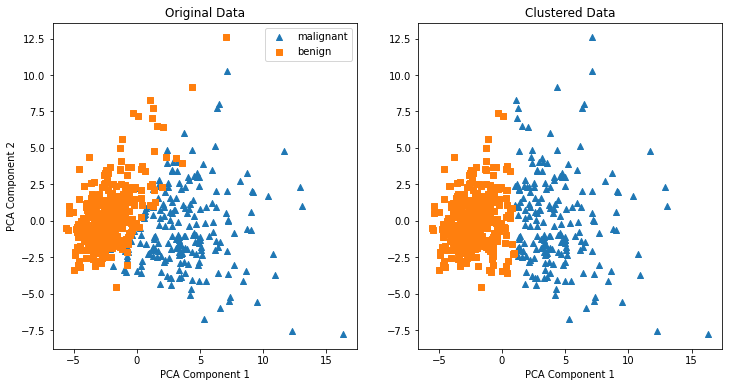

In [16]:
#08. 군집화 시각화 및 원데이터와 비교하기. 
markers = ['^','s']
df_bcancer_pc_2['target'] = bcancer.target
df_bcancer_pc_2['cluster_num'] = kmeans.labels_

fig, axs = plt.subplots(figsize= (12,6), ncols =2, nrows= 1)
for k, column in enumerate(['target','cluster_num'])    :
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df_bcancer_pc_2[df_bcancer_pc_2[column] == i ]['PC1']
        y_axis_data = df_bcancer_pc_2[df_bcancer_pc_2[column] == i ]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker = marker,label = bcancer.target_names[i])

    if k == 0                                           : 
        ax.legend()
        ax.set_ylabel('PCA Component 2')
        ax.set_title('Original Data')
    else                                                : 
        ax.set_title('Clustered Data')
    ax.set_xlabel('PCA Component 1')